# 합성곱 신경망의 시각화

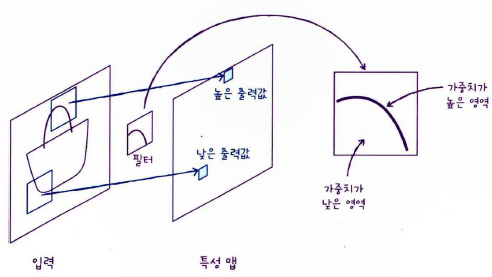

In [14]:
# 가중치 시각화

import keras
model = keras.models.load_model('best-cnn-model.keras')

In [15]:
#케라스 모델에 추가한 층 속성 찾기

model.layers 

[<Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_3, built=True>]

In [16]:
# 합성곱 층의 가중치 조사

conv= model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape) # 가중치와 절편은 층의 weight속성에 저장, 첫번째 원소 = 가중치 , 두번째 원소 = 절편

# (3,3,1,32) : 커널의 크기 3*3, 깊이 1, 필터(도장)개수 32
# (32, ): 필터(도장)에 달린 절편 개수

(3, 3, 1, 32) (32,)


In [17]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std()) # 가중치 배열의 평균, 표준편차

-0.024030901 0.26287925


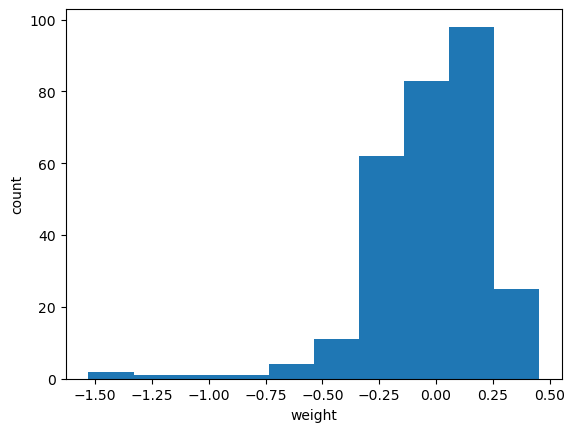

In [18]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1,1)) #hist() 함수에는 1차원 배열로 전달해야함
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

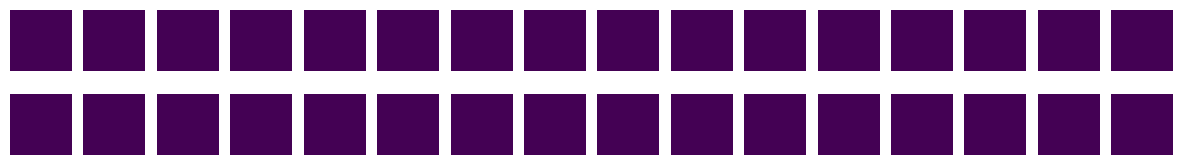

In [19]:
fig, axs = plt.subplots(2,16, figsize = (15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0, i*16 + j], vmin=0.5, vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [21]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Input(shape=(28,28,1)))
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=\
                                          'relu', padding='same'))
                                          

In [23]:
no_training_conv=no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [25]:
no_training_weights=no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.002369578 0.07973284


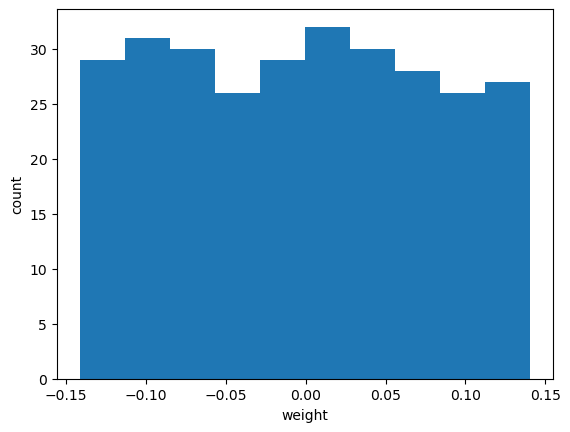

In [26]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

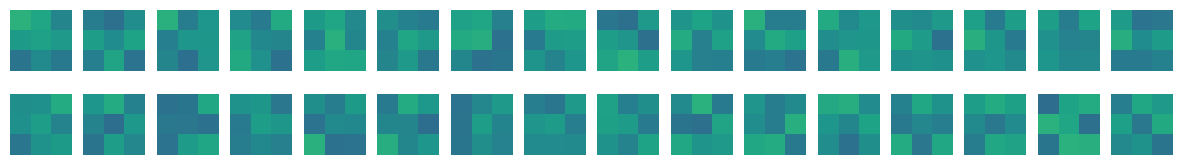

In [28]:
fig, axs = plt.subplots(2,16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5,
                        vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [29]:
# 함수형 API

inputs = keras.Input(shape=(784,))
dense1 = keras.layers.Dense(100, activation='relu')
dense2 = keras.layers.Dense(10, activation = 'softmax')


In [30]:
hidden = dense1(inputs)

In [31]:
outputs = dense2(hidden)

In [32]:
func_model = keras.Model(inputs, outputs)

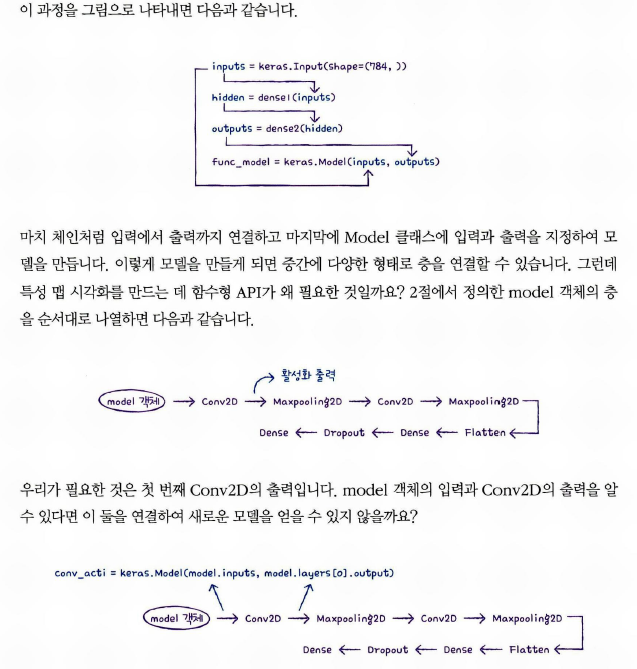

In [33]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer_1>]


In [34]:
conv_acti = keras.Model(model.inputs[0], model.layers[0].output)

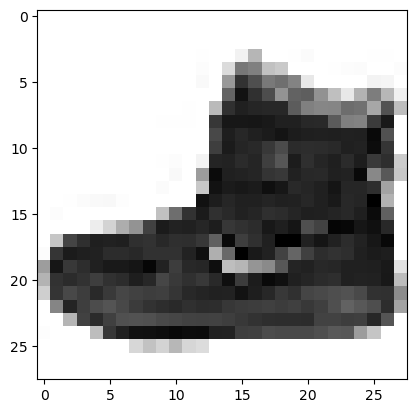

In [35]:
# 특성 맵 시각화 
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap = 'gray_r')
plt.show()

In [36]:
ankle_boot = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps=conv_acti.predict(ankle_boot)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


In [37]:
print(feature_maps.shape)

(1, 28, 28, 32)


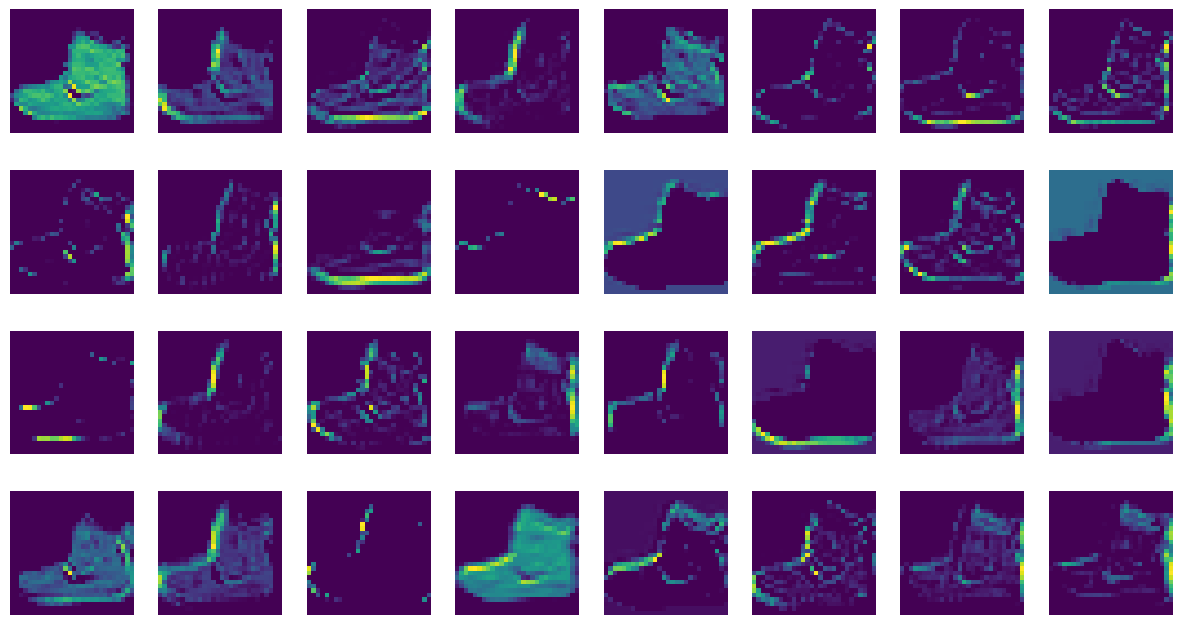

In [39]:
fis,axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

In [42]:
conv2_acti = keras.Model(model.inputs[0], model.layers[2].output)

In [43]:
feature_maps = conv2_acti.predict(ankle_boot)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [44]:
print(feature_maps.shape)

(1, 14, 14, 64)


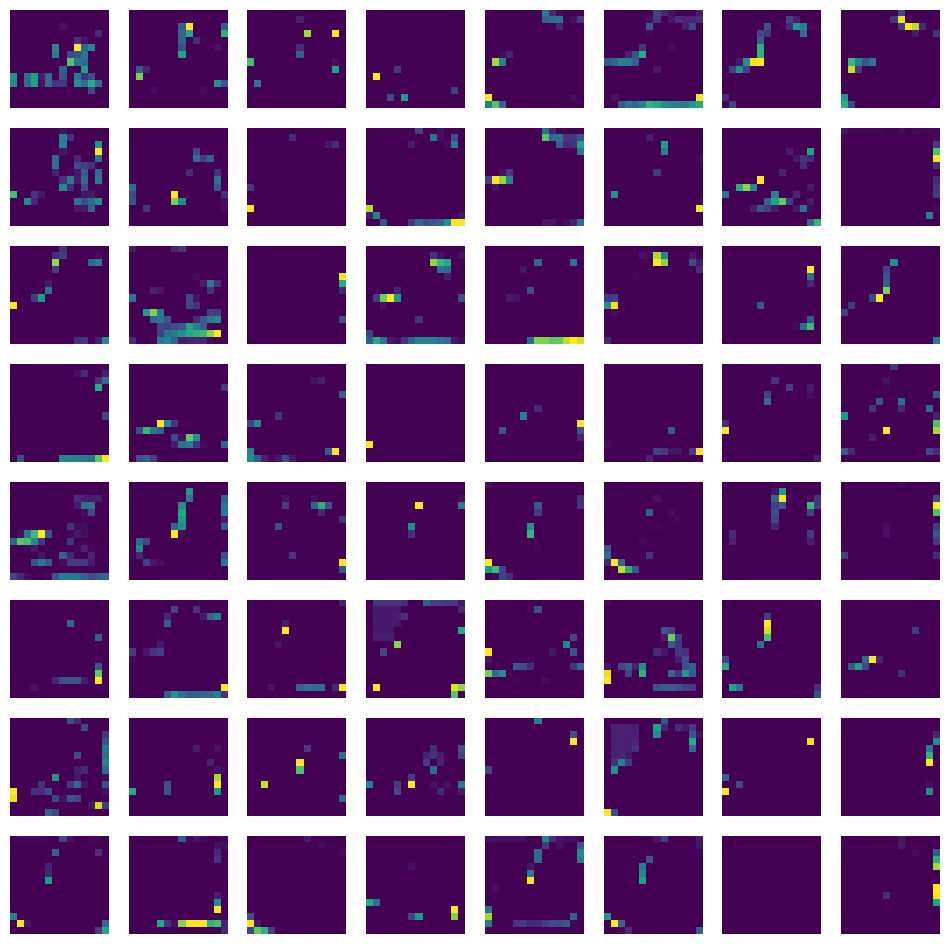

In [46]:
fig, axs = plt.subplots(8,8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

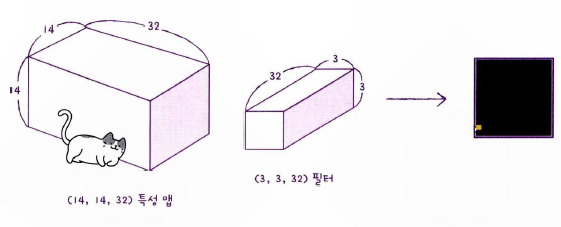